# Replace Convolution2d Weight
---

In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 亂數 Init
weightInit = tf.random_normal_initializer(0, 0.3)
biasInit = tf.random_normal_initializer(0, 0.1)

In [3]:
input = tf.placeholder(
    tf.float32,
    [None, 3, 3, 1]
)

# 兩個測試網路
t1layer1 = tf.layers.conv2d(
    inputs=input,
    filters=2,
    kernel_size=3,
    strides=1,
    kernel_initializer=weightInit,
    bias_initializer=biasInit,
    activation=tf.nn.relu,
    name="Test1_Layer1"
)
print(t1layer1)
t2layer1 = tf.layers.conv2d(
    inputs=input,
    filters=2,
    kernel_size=3,
    strides=1,
    kernel_initializer=weightInit,
    bias_initializer=biasInit,
    activation=tf.nn.relu,
    name="Test2_Layer1"
)
print(t2layer1)

Tensor("Test1_Layer1/Relu:0", shape=(?, 1, 1, 2), dtype=float32)
Tensor("Test2_Layer1/Relu:0", shape=(?, 1, 1, 2), dtype=float32)


In [4]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [5]:
def PrintWeight(name):
    weightNode = session.graph.get_tensor_by_name(name + "/kernel:0")
    biasNode = session.graph.get_tensor_by_name(name + "/bias:0")
    
    # 拿出結果
    weightValue = session.run(weightNode)
    biasValue = session.run(biasNode)
    
    print("Weight:")
    
    # 因為有兩個 Filter 所以要切兩個
    fig, axes = plt.subplots(1, 2)
    for i in range(0, 2):
        # 顯示圖片，並限制最大最小值
        im = axes[i].imshow(np.reshape(weightValue[:, :, :, i], [3, 3]), cmap='seismic', vmin=-1, vmax = 1)
        
    # 增加寬度
    fig.subplots_adjust(wspace=0.3)
    
    # 增加 Colorbar 的軸，上面的四個值分別是[左，右，寬，高]，測出來的
    colorbarAxes = fig.add_axes([0.95, 0.2, 0.02, 0.6])
    colorbar = fig.colorbar(im, cax=colorbarAxes)
    
    # 設定右邊要顯示的值
    colorbar.set_ticks([-1, 0 , 1])
    colorbar.set_ticklabels(['-1', '0' , '1'])
    
    # 顯示圖片 
    plt.show()
        
    print("Bias:")
    print(biasValue)

In [6]:
def PrintAll():
    print("Layer1")
    PrintWeight("Test1_Layer1")
    print()
    print()
    print()
    print("Layer2")
    PrintWeight("Test2_Layer1")

Layer1
Weight:


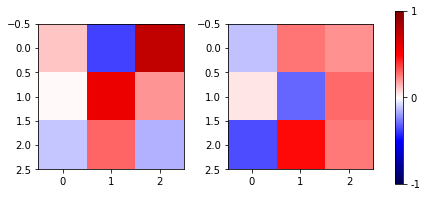

Bias:
[-0.05193079 -0.02034139]



Layer2
Weight:


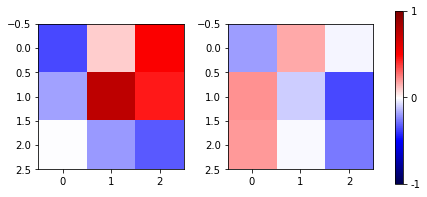

Bias:
[-0.01748135 -0.15751819]


In [7]:
PrintAll()

In [8]:
# 拿 Node
t1weightNode = session.graph.get_tensor_by_name("Test1_Layer1/kernel:0")
t1biasNode = session.graph.get_tensor_by_name("Test1_Layer1/bias:0")
t2weightNode = session.graph.get_tensor_by_name("Test2_Layer1/kernel:0")
t2biasNode = session.graph.get_tensor_by_name("Test2_Layer1/bias:0")

print(t1weightNode)
print(t1biasNode)
print(t2weightNode)
print(t2biasNode)

# 取代
assignWeightNode = tf.assign(t2weightNode, t1weightNode)
assignBiasNode = tf.assign(t2biasNode, t1biasNode)
session.run([assignWeightNode, assignBiasNode]);

Tensor("Test1_Layer1/kernel:0", shape=(3, 3, 1, 2), dtype=float32_ref)
Tensor("Test1_Layer1/bias:0", shape=(2,), dtype=float32_ref)
Tensor("Test2_Layer1/kernel:0", shape=(3, 3, 1, 2), dtype=float32_ref)
Tensor("Test2_Layer1/bias:0", shape=(2,), dtype=float32_ref)


Layer1
Weight:


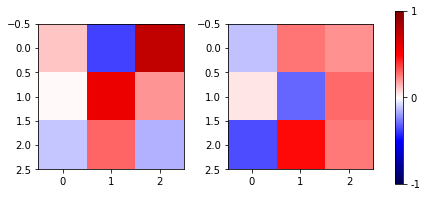

Bias:
[-0.05193079 -0.02034139]



Layer2
Weight:


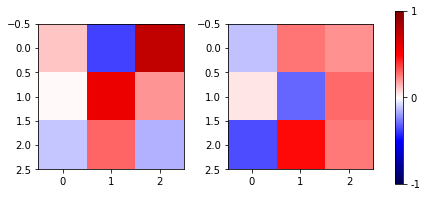

Bias:
[-0.05193079 -0.02034139]


In [9]:
PrintAll()